In [1]:
from numpy import mean,std
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras import metrics
from keras import backend as k
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data=mnist.load_data()


In [3]:
(X_train,y_train),(X_test,y_test)=data
print(X_train[0].shape)
X_train.shape

(28, 28)


(60000, 28, 28)

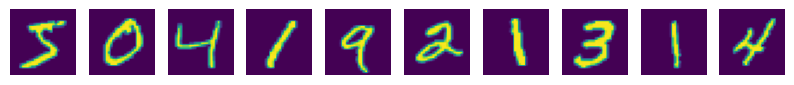

[5 0 4 1 9 2 1 3 1]


In [4]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()
print(y_train[0:9])

In [5]:
X_train=X_train.reshape((X_train.shape[0],28*28)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28*28)).astype('float32')

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
from keras.utils import np_utils
print(y_test.shape)
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]
y_test.shape

(10000,)


(10000, 10)

In [8]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
model=Sequential()
model.add(Dense(32,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
 
model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.8769
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1982 - accuracy: 0.9419
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1528 - accuracy: 0.9542
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1269 - accuracy: 0.9625
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1104 - accuracy: 0.9668
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0966 - accuracy: 0.9707
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0861 - accuracy: 0.9742
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9754
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9780
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9802

In [11]:
scores=model.evaluate(X_test,y_test)
print('Accuracy',scores[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9663
Accuracy 96.63000106811523


In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1004
           1       0.96      0.95      0.96      1138
           2       0.85      0.87      0.86      1008
           3       0.85      0.83      0.84      1041
           4       0.87      0.87      0.87       987
           5       0.85      0.84      0.84       902
           6       0.89      0.90      0.90       942
           7       0.90      0.91      0.90      1013
           8       0.80      0.82      0.81       951
           9       0.86      0.85      0.86      1014

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
 samples avg       0.88      0.88      0.88     10000



In [14]:
print('Accuracy',accuracy_score(y_pred_dtc,y_test)*100)

Accuracy 87.76
